## What is Image Augmentation?

Image augmentation was basically created to help deep learning models get more accuracy. Image augmentation can be said as a technical approach of adjusting the existing data in order to create more data from the existing data for training the model for more accuracy. Simply it expands the existing data.

In this tutorial,  we will learn how to apply various image augmentation techniques with TensorFlow 2.0. Some Transformation techniques are as follows :

* Random flipping to left-right.
* Randomly changes in contrast, brightness, saturation and hue
* Distortion and cropping of images.



## Importing the required Libraries.

Lets import all the required libraries for Applying image augmentation.

In [3]:
from __future__ import absolute_import, division, print_function

from IPython.display import Image as IImage, display
import numpy as np
import PIL
from PIL import Image
import random
import requests
import tensorflow as tf

## Downloading/ Import an Image to numpy array.

The next step is to download or import an image for augmentation. Imported Image

(NOTE - Importing an image from the drive or from the system files can also be done.)

In [5]:
# Load image to numpy array.
img = PIL.Image.open('/content/apj_abdul_kalam.jpg')
img.load()
img_array = np.array(img)


## Displaying the loaded image.

Now that we have successfully loaded our image we now display it.

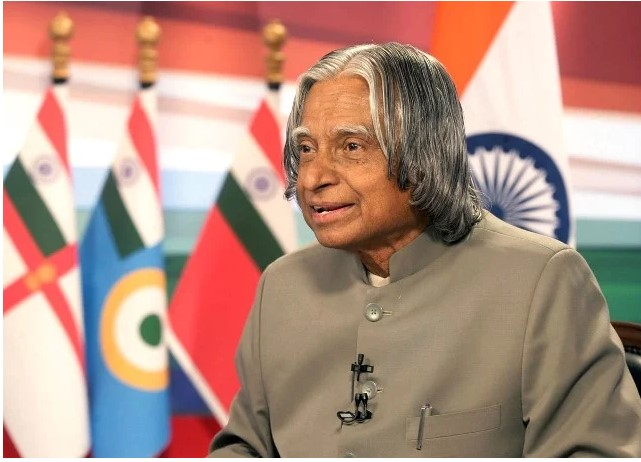

In [8]:
# Display image.
from IPython import display
display.Image("/content/apj_abdul_kalam.jpg")


## 1) Randomly Flipping to left-Right.



Now that we have imported the image, lets proceed with transforming the image.

Firstly we begin with flipping the image. We will randomly flip the image left-right and display it accordingly.

In [9]:
# Randomly flip an image.
def random_flip_left_right(image):
    return tf.image.random_flip_left_right(image)

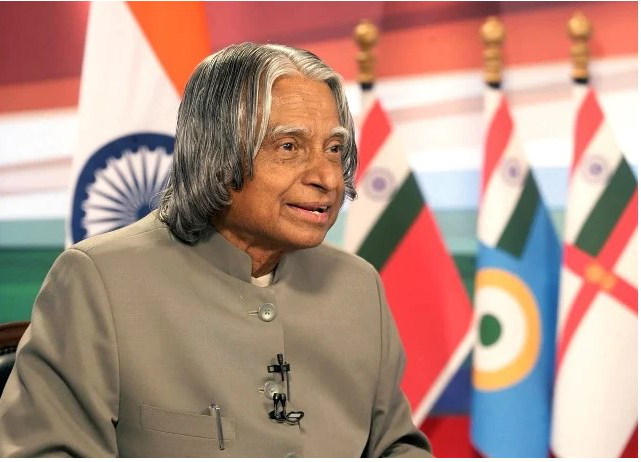

In [10]:
# Display randomly flipped image.
PIL.Image.fromarray(random_flip_left_right(img_array).numpy())

## 2) Randomly changing the image contrast.

Contrast determines the number of shades in the image.

* Low Contrast = Image lacks dimensions and looks soft.
* Normal Contrast = Image retains details, dimensions and looks crisp.
* High Contrast = Image loses details in gradated tone areas and can look cartoony.

Here , we simply change the contrast by specifying the minimum and maximum value randomly.

In [11]:
# Randomly change an image contrast.
def random_contrast(image, minval=1.2, maxval=2.9):
    r = tf.random.uniform([], minval=minval, maxval=maxval)
    image = tf.image.adjust_contrast(image, contrast_factor=r)
    return tf.cast(image, tf.uint8)

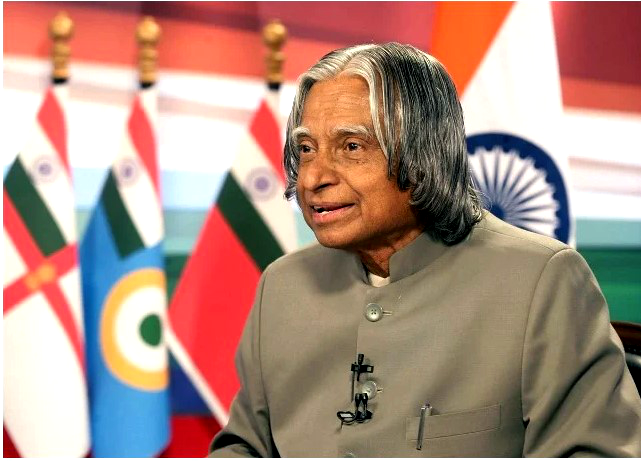

In [12]:
# Display image with different contrast.
PIL.Image.fromarray(random_contrast(img_array).numpy())

## 3) Randomly Changing the image brightness.

Brightness generally refers to the value of tones (lightness / darkness ) in an  image. It can also be referred as the intensity acquired of an image.

* Increasing brightness = Will light out all the colors.
* Decreasing brightness = Will darken out all the colors.

Here, We will randomly increase the brightness of the imported image.

In [13]:
# Randomly change an image brightness
def random_brightness(image, minval=0., maxval=.2):
    r = tf.random.uniform([], minval=minval, maxval=maxval)
    image = tf.image.adjust_brightness(image, delta=r)
    return tf.cast(image, tf.uint8)

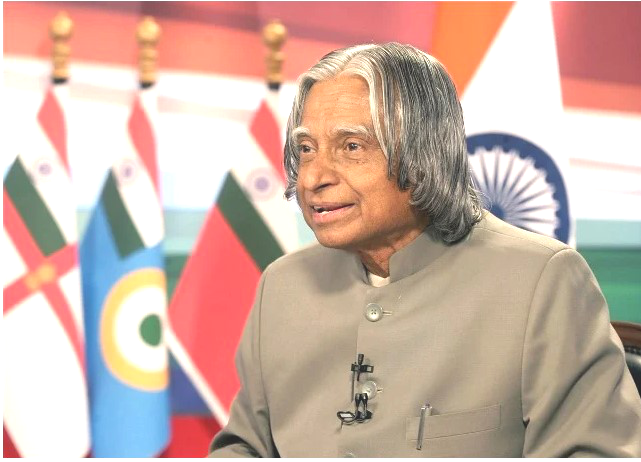

In [14]:
# Display image with different brightness.
PIL.Image.fromarray(random_brightness(img_array).numpy())

## 4) Randomly Changing the image Saturation.

Saturation refers to the intensity of the colors present in the image. The more the image is saturated, the more colorful and vibrant it will appear.

Here, for our imported image we will be focusing on increasing the saturation randomly that will help our image look more colorful and vibrant.

In [ ]:
# Randomly change an image saturation
def random_saturation(image, minval=0.5, maxval=2.3):
    r = tf.random.uniform((), minval=minval, maxval=maxval)
    image = tf.image.adjust_saturation(image, saturation_factor=r)
    return tf.cast(image, tf.uint8)

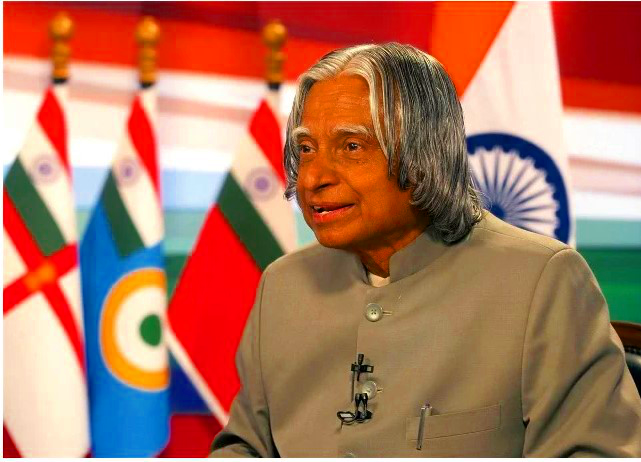

In [ ]:
# Display image with different staturation.
PIL.Image.fromarray(random_saturation(img_array).numpy())

## 5) Randomly Changing the image Hue.

Hue is the spectrum of colors found on the color wheel. Hues are made up of the three primary colors (red, blue, yellow) and the three secondary colors (orange, green, and violet) .

For the imported image we will be adding hue to adjust our image to make it look more cromatic.

In [ ]:
# Randomly change an image hue.
def random_hue(image, minval=-0.04, maxval=0.08):
    r = tf.random.uniform((), minval=minval, maxval=maxval)
    image = tf.image.adjust_hue(image, delta=r)
    return tf.cast(image, tf.uint8)

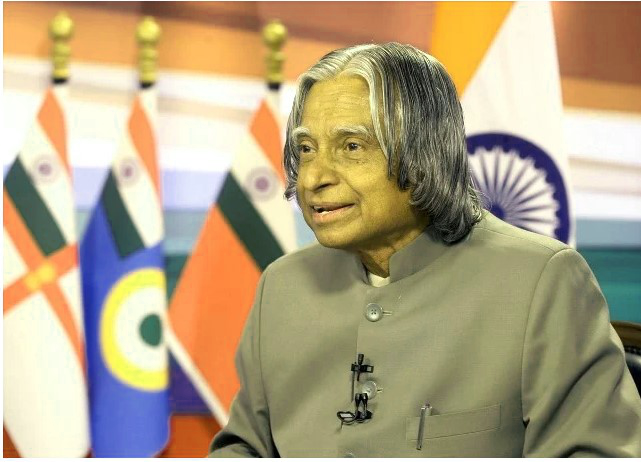

In [ ]:
# Display image with different hue.
PIL.Image.fromarray(random_hue(img_array).numpy())

## 6) Distort an image by cropping.

We can use this to crop our image to highlight only the specific region of an image.

In [ ]:
# Distort an image by cropping it with a different aspect ratio.
def distorted_random_crop(image,
                min_object_covered=0.5,
                aspect_ratio_range=(3./5., 4./5.),
                area_range=(0.09, 1.0),
                max_attempts=100,
                scope=None):

    cropbox = tf.constant([0.0, 0.0, 1.0, 1.0], dtype=tf.float32, shape=[1, 1, 4])
    sample_distorted_bounding_box = tf.image.sample_distorted_bounding_box(
        tf.shape(image),
        bounding_boxes=cropbox,
        min_object_covered=min_object_covered,
        aspect_ratio_range=aspect_ratio_range,
        area_range=area_range,
        max_attempts=max_attempts,
        use_image_if_no_bounding_boxes=True)
    bbox_begin, bbox_size, distort_bbox = sample_distorted_bounding_box

    # Crop the image to the specified bounding box.
    cropped_image = tf.slice(image, bbox_begin, bbox_size)
    return cropped_image

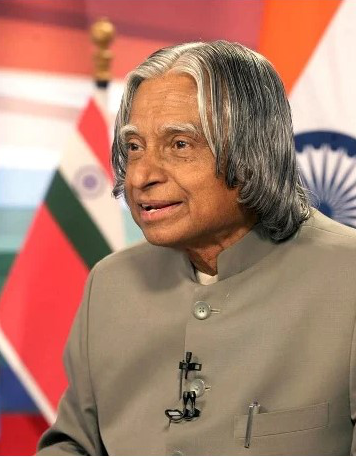

In [ ]:
# Display cropped image.
PIL.Image.fromarray(distorted_random_crop(img_array).numpy())

## 7) Performing All the transformation to the imported Image.

Now, that we have see all the various transformations that can be applied to an image and what all changes it can bring to the original image, let try and combine all the transformations to our imported image image. This is one of the common augmentation techniques that is used in Image classifications and various deep learning models to modify the images.

Here we will simply call all the performed transformations to the image at once and display the fully pre-processed resulting output image.

In [ ]:
# Apply all transformations to an image.
# That is a common image augmentation technique for image datasets, such as ImageNet.
def transform_image(image):
    image = distorted_random_crop(image)
    image = random_flip_left_right(image)
    image = random_contrast(image)
    image = random_brightness(image)
    image = random_hue(image)
    image = random_saturation(image)
    return image

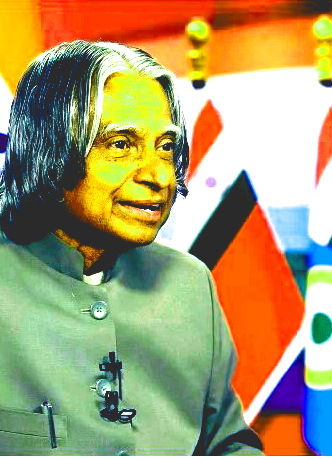

In [ ]:
# Display fully pre-processed image.
transformed_img = transform_image(img_array).numpy()
PIL.Image.fromarray(transformed_img)

#Conclusion:

In this tutorial, we explored various image augmentation and transformation techniques and how they are been performed using TensorFlow 2.0. At the end we also combined all the transformations to our imported image. The modifying of the existing data for our deep learning models for better accuracy in finding patterns can be done with the use of these techniques.